## Lab 2 (ML)
### Name: Smit Khobragade
### Roll no.: 64
### Sec: A


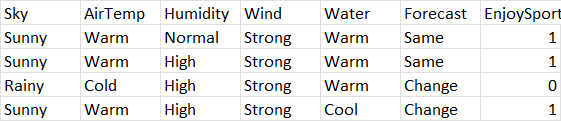

In [ ]:
import numpy as np

def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == "?" or (x != "0" and (x == y or y == "0"))
        more_general_parts.append(mg)
    return all(more_general_parts)

def more_specific(h1, h2):
    return more_general(h2, h1)

def get_general_hypothesis(n):
    return ["?"] * n

def get_specific_hypothesis(n):
    return ["0"] * n

def min_generalizations(h, d):
    h_new = list(h)
    for i in range(len(h)):
        if not more_general([h[i]], [d[i]]):
            h_new[i] = d[i] if h[i] == "0" else "?"
    return [tuple(h_new)]

def min_specializations(h, domains, d):
    results = []
    for i in range(len(h)):
        if h[i] == "?":
            for val in domains[i]:
                if d[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != "0":
            h_new = h[:i] + ("0",) + h[i+1:]
            results.append(h_new)
    return results

def candidate_elimination(examples):
    domains = [list(set([ex[i] for ex in examples])) for i in range(len(examples[0]) - 1)]
    n = len(domains)

    G = {tuple(get_general_hypothesis(n))}
    S = {tuple(get_specific_hypothesis(n))}

    for index, ex in enumerate(examples):
        x, label = ex[:-1], ex[-1]

        if label == 'Yes': # Positive example
            G = {g for g in G if more_general(g, x)}
            S_new = S.copy()
            for s in S:
                if not more_general(s, x):
                    S_new.remove(s)
                    S_new.update(min_generalizations(s, x))
            S = {s for s in S_new if any(more_general(g, s) for g in G)}
        else: # Negative example
            S = {s for s in S if not more_general(s, x)}
            G_new = G.copy()
            for g in G:
                if more_general(g, x):
                    G_new.remove(g)
                    G_new.update(min_specializations(g, domains, x))
            G = {g for g in G_new if any(more_general(g, s) for s in S)}

        # hypotheses after each example
        print(f"Dataset {index + 1}: {ex}")
        print(f"S{index + 1} = {S}")
        print(f"G{index + 1} = {G}\n")

    return S, G

examples = [
    ('Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'),
    ('Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'),
    ('Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'),
    ('Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes')
]

S, G = candidate_elimination(examples)
print("Final specific hypotheses S:")
for s in S:
    print(s)
print("\nFinal general hypotheses G:")
for g in G:
    print(g)


Dataset 1: ('Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes')
S1 = {('Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same')}
G1 = {('?', '?', '?', '?', '?', '?')}

Dataset 2: ('Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes')
S2 = {('Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same')}
G2 = {('?', '?', '?', '?', '?', '?')}

Dataset 3: ('Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No')
S3 = {('Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same')}
G3 = {('?', '?', '?', '?', '?', 'Same'), ('?', 'Warm', '?', '?', '?', '?'), ('Sunny', '?', '?', '?', '?', '?')}

Dataset 4: ('Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes')
S4 = {('Sunny', 'Warm', '?', 'Strong', '?', '?')}
G4 = {('?', 'Warm', '?', '?', '?', '?'), ('Sunny', '?', '?', '?', '?', '?')}

Final specific hypotheses S:
('Sunny', 'Warm', '?', 'Strong', '?', '?')

Final general hypotheses G:
('?', 'Warm', '?', '?', '?', '?')
('Sunny', '?', '?', '?', '?', '?')
